# Analyse Google Trends
Belirtilen anahtar kelimeler ve zaman aralıkları için Google Trends verilerini analiz eden ve görselleştiren bir Python uygulaması oluşturun. Bu uygulama, veri çekme, ilgi zirvelerini belirleme ve matplotlib kullanarak trendleri çizme işlemlerini içermelidir.

## Kütüphaneleri İçe Aktar

### Subtask:
Google Trend verilerini almak ve analiz etmek için gerekli kütüphaneleri (pytrends, pandas, matplotlib) içe aktarın.


**Reasoning**:
The subtask requires importing specific Python libraries to retrieve and analyze Google Trends data. I will import `TrendReq` from `pytrends.request`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.



In [ ]:
!pip install pytrends

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
print("Kütüphaneler başarıyla içe aktarıldı.")

Kütüphaneler başarıyla içe aktarıldı.


## Google Trend Verilerini Çekme Fonksiyonu Tanımlama

### Subtask:
Belirtilen anahtar kelime(ler) ve zaman aralığı için Google Trend ilgi verilerini çekmek üzere bir fonksiyon (örneğin, `get_google_trends_data`) tanımlayın.


**Reasoning**:
I need to define a Python function `get_google_trends_data` as specified in the instructions. This function will encapsulate the logic for connecting to the Google Trends API, building the payload, fetching data using `interest_over_time`, and cleaning the resulting DataFrame by removing the 'isPartial' column. This aligns with the subtask's goal of defining a function to retrieve Google Trends data.



In [ ]:
def get_google_trends_data(keywords, timeframe):
    # Google Trends API'ye bağlan
    pytrends = TrendReq(hl='en-US', tz=360)

    # Sorgu için payload oluştur
    pytrends.build_payload(kw_list=keywords, cat=0, geo='', timeframe=timeframe, gprop='')

    # Trend verilerini çek
    df = pytrends.interest_over_time()

    # 'isPartial' sütununu kaldır
    if not df.empty and 'isPartial' in df.columns:
        df = df.drop(columns=['isPartial'])

    print(f"SAnahtar kelimeler için data oluşturuldu: {keywords} and timeframe: {timeframe}")
    return df

## Trendleri Analiz Etme ve Görselleştirme Fonksiyonu Tanımlama

### Subtask:
Çekilen Trend verilerini analiz eden (örneğin, ilgi zirvelerini bulma) ve matplotlib kullanarak bir çizgi grafik ile görselleştiren bir fonksiyon (örneğin, `analyze_and_plot_trends`) tanımlayın. Görselleştirmede uygun etiketler ve başlıklar eklendiğinden emin olun.


In [ ]:
def analyze_and_plot_trends(trend_data_df, keywords):
    plt.figure(figsize=(14, 7))
    # Her bir anahtar kelime için trendi çiz ve zirveleri bul
    for keyword in keywords:
        if keyword in trend_data_df.columns:
            plt.plot(trend_data_df.index, trend_data_df[keyword], label=keyword)

            # İlgi zirvesini bulma
            peak_interest = trend_data_df[keyword].max()
            peak_date = trend_data_df[keyword].idxmax()
            print(f"Anahtar Kelime: '{keyword}' - Zirve İlgi Düzeyi: {peak_interest} (Tarih: {peak_date.strftime('%Y-%m-%d')})")
        else:
            print(f"Uyarı: '{keyword}' anahtar kelimesi veri çerçevesinde bulunamadı.")

    # Grafik başlığı ve eksen etiketleri
    plt.title('Google Trend İlgi Alanı', fontsize=16)
    plt.xlabel('Tarih', fontsize=12)
    plt.ylabel('İlgi Düzeyi', fontsize=12)
    plt.legend(title='Anahtar Kelimeler')
    plt.grid(True)
    plt.tight_layout()
    return plt.gcf() # Return the current figure instead of showing it

print("Grafik fonksiyonu başarıyla güncellendi.")

Grafik fonksiyonu başarıyla güncellendi.


## Uygulamayı Oluşturma ve Çalıştırma

### Subtask:
Tanımlanan fonksiyonları bir araya getirerek, bir veya daha fazla anahtar kelime için Google Trend analizi yapabilen basit bir uygulama yapısı oluşturun ve örnek bir sorgu ile çalıştırın.


**Reasoning**:
I need to implement the application structure by defining keywords and a timeframe, then using the `get_google_trends_data` and `analyze_and_plot_trends` functions as instructed to fetch and visualize Google Trends data.



Trendler analiz ediliyor: ['Temu', 'Eşref Rüya', 'Fenerbahçe'] over timeframe: today 12-m


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


SAnahtar kelimeler için data oluşturuldu: ['Temu', 'Eşref Rüya', 'Fenerbahçe'] and timeframe: today 12-m
Anahtar Kelime: 'Temu' - Zirve İlgi Düzeyi: 96 (Tarih: 2025-04-20)
Anahtar Kelime: 'Eşref Rüya' - Zirve İlgi Düzeyi: 19 (Tarih: 2025-09-21)
Anahtar Kelime: 'Fenerbahçe' - Zirve İlgi Düzeyi: 100 (Tarih: 2025-11-30)


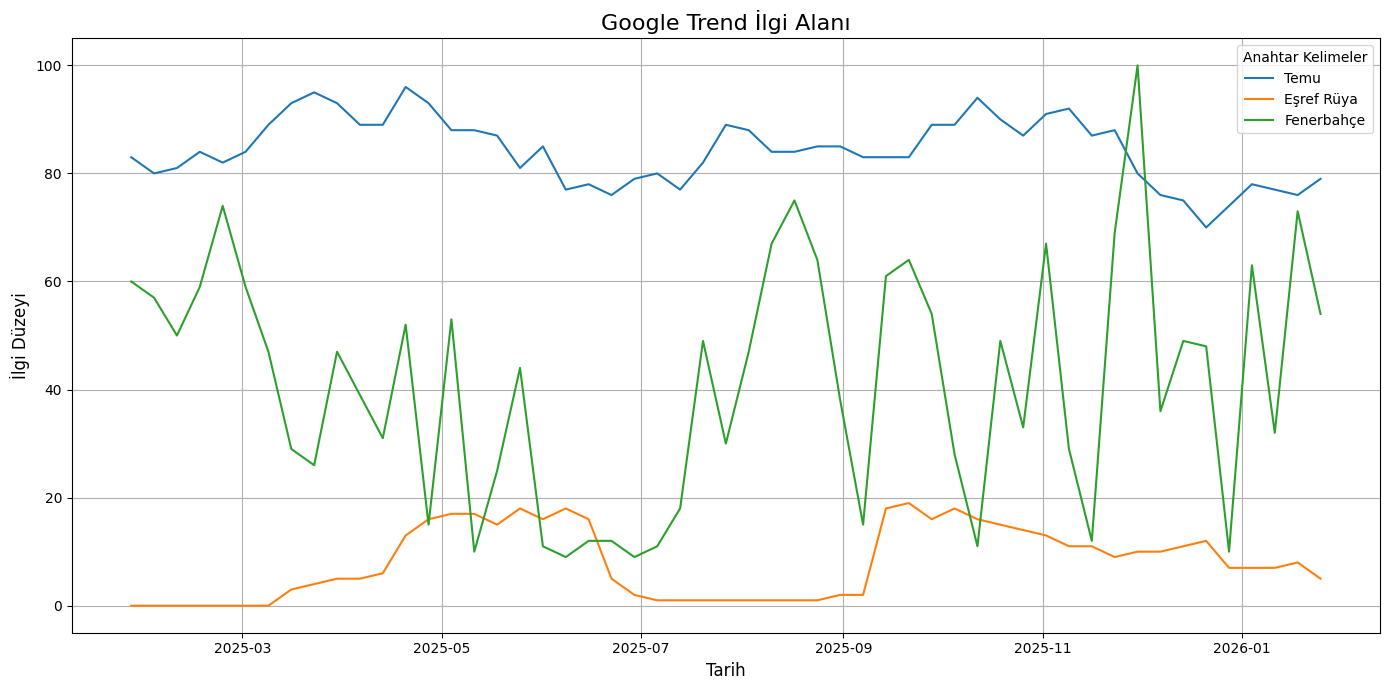

In [ ]:
from pytrends import exceptions # Import exceptions module to catch TooManyRequestsError

keywords = ['Temu','Eşref Rüya', 'Fenerbahçe']
#keywords = ['Yapay Zeka', 'Makine Öğrenimi', 'Veri Bilimi']
timeframe = 'today 12-m'  # Son 1 yıl

print(f"Trendler analiz ediliyor: {keywords} over timeframe: {timeframe}")

# Google Trend verilerini çek
try:
    trend_data = get_google_trends_data(keywords, timeframe)

    # Trendleri analiz et ve görselleştir
    if not trend_data.empty:
        analyze_and_plot_trends(trend_data, keywords)
    else:
        print("Data yok.")
except exceptions.TooManyRequestsError:
    print("Çok fazla istek yaptınız biraz bekleyiniz.")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

**Reasoning**:
The previous step produced a `FutureWarning` from pandas, triggered by `pytrends`'s internal use of `fillna`. To address this warning, I will explicitly set a pandas option `future.no_silent_downcasting` to `True`, which aligns with the suggestion in the warning message to opt-in to future behavior, thus preventing the warning from appearing.



In [ ]:
import gradio as gr
from datetime import datetime, timedelta

# Zaman dilimi seçeneklerini pytrends formatına dönüştüren yardımcı fonksiyon
def get_timeframe_string(selected_timeframe):
    if selected_timeframe == 'Son 1 Ay':
        return 'today 1-m'
    elif selected_timeframe == 'Son 3 Ay':
        return 'today 3-m'
    elif selected_timeframe == 'Son 1 Yıl':
        return 'today 12-m'
    elif selected_timeframe == 'Son 5 Yıl':
        return 'today 5-y'
    else: # Özel zaman aralığı
        return selected_timeframe # Kullanıcının doğrudan girdiği değeri kullan

def run_analysis(keywords_str, selected_timeframe, custom_timeframe):
    keywords_list = [kw.strip() for kw in keywords_str.split(',') if kw.strip()]
    if not keywords_list:
        return None, "Lütfen en az bir anahtar kelime giriniz."

    if selected_timeframe == 'Özel Zaman Aralığı' and custom_timeframe:
        current_timeframe = custom_timeframe
    else:
        current_timeframe = get_timeframe_string(selected_timeframe)

    try:
        trend_data = get_google_trends_data(keywords_list, current_timeframe)
        if not trend_data.empty:
            fig = analyze_and_plot_trends(trend_data, keywords_list)
            return fig, "Trend analizi başarıyla tamamlandı."
        else:
            return None, "Anahtar kelimeler için yeterli veri bulunamadı."
    except exceptions.TooManyRequestsError:
        return None, "Google Trends API'ye çok fazla istek yapıldı. Lütfen bir süre bekleyip tekrar deneyin."
    except Exception as e:
        return None, f"Beklenmedik bir hata oluştu: {e}"

# Gradio Arayüzü
with gr.Blocks() as demo:
    gr.Markdown("# Google Trends Analiz Uygulaması")
    with gr.Row():
        keywords_input = gr.Textbox(label="Anahtar Kelimeler (virgülle ayırın)", placeholder="Örn: Yapay Zeka, Makine Öğrenimi")
    with gr.Row():
        timeframe_dropdown = gr.Dropdown(
            label="Zaman Aralığı",
            choices=['Son 1 Ay', 'Son 3 Ay', 'Son 1 Yıl', 'Son 5 Yıl', 'Özel Zaman Aralığı'],
            value='Son 1 Yıl'
        )
        custom_timeframe_input = gr.Textbox(
            label="Özel Zaman Aralığı (örn: 2018-01-01 2018-12-31)",
            placeholder="Sadece 'Özel Zaman Aralığı' seçiliyse kullanılır",
            interactive=False
        )
    analyze_button = gr.Button("Trendleri Analiz Et")

    output_plot = gr.Plot(label="Google Trend İlgi Alanı")
    output_message = gr.Textbox(label="Durum Mesajı", interactive=False)

    def toggle_custom_timeframe_input(selected_value):
        return gr.Textbox(interactive=selected_value == 'Özel Zaman Aralığı')

    timeframe_dropdown.change(
        toggle_custom_timeframe_input,
        inputs=timeframe_dropdown,
        outputs=custom_timeframe_input
    )

    analyze_button.click(
        run_analysis,
        inputs=[keywords_input, timeframe_dropdown, custom_timeframe_input],
        outputs=[output_plot, output_message]
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2ac596ad2a51609cf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
